In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2 as cv
import pandas as pandas
import matplotlib.pyplot as plt
import os
from google.colab.patches import cv2_imshow

In [ ]:
file = ["0","1","2","3"]
# giloma -1
# meningioma  - 2
# pituitary - 3
X=[]
Y=[]

for i in file:
    for (root,dirs,file) in os.walk('/content/drive/MyDrive/Dataset/dataset2/Training/'+i):
        for f in file:
            path = ('/content/drive/MyDrive/Dataset/dataset2/Training/'+i+'/'+f)
            print(path)
            #print(path)
            img1 = cv.imread(path)
            # img1 = img1[45:590,100:716] #crop
            img1 = cv.resize(img1,(224,224))
            X.append(img1)
            Y.append(i)

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Dataset/dataset2/Training/0/Tr-no_0609.jpg
/content/drive/MyDrive/Dataset/dataset2/Training/0/Tr-no_1525.jpg
/content/drive/MyDrive/Dataset/dataset2/Training/0/Tr-no_1387.jpg
/content/drive/MyDrive/Dataset/dataset2/Training/0/Tr-no_1549.jpg
/content/drive/MyDrive/Dataset/dataset2/Training/0/Tr-no_1272.jpg
/content/drive/MyDrive/Dataset/dataset2/Training/0/Tr-no_0977.jpg
/content/drive/MyDrive/Dataset/dataset2/Training/0/Tr-no_0980.jpg
/content/drive/MyDrive/Dataset/dataset2/Training/0/Tr-no_1305.jpg
/content/drive/MyDrive/Dataset/dataset2/Training/0/Tr-no_1451.jpg
/content/drive/MyDrive/Dataset/dataset2/Training/0/Tr-no_1371.jpg
/content/drive/MyDrive/Dataset/dataset2/Training/0/Tr-no_0729.jpg
/content/drive/MyDrive/Dataset/dataset2/Training/0/Tr-no_1414.jpg
/content/drive/MyDrive/Dataset/dataset2/Training/0/Tr-no_1099.jpg
/content/drive/MyDrive/Dataset/dataset2/Training/0/Tr-no_1262.jpg
/content/drive/MyDrive/Da

In [ ]:
X =np.asarray(X).reshape(len(X),224,224,3)
X.shape    # images

(5712, 224, 224, 3)

In [ ]:
Y = np.asarray(Y)
Y.shape   #labels


#image = np.asarray(image).reshape(372,875,6565,3)

(5712,)

In [ ]:
X[0].shape

(224, 224, 3)

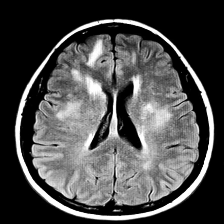

In [ ]:
cv2_imshow(X[0])

In [ ]:
import keras
import tensorflow as tf
from keras.applications.vgg19 import VGG19

In [ ]:
from sklearn.model_selection import train_test_split
#import tensorflow as tf
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [ ]:
Y_train = tf.keras.utils.to_categorical(Y_train, 4)
Y_test = tf.keras.utils.to_categorical(Y_test, 4)

In [ ]:

import keras,tensorflow
from keras.applications.vgg19 import VGG19

img_height = 224   # 875 x 656
img_width = 224
img_channels = 3
num_classes = 4
#learning_rate = 1e-5


def build_model():
    base = VGG19(include_top = False, weights = 'imagenet', input_shape = (img_height, img_width, img_channels))
    X = base.output
    X = keras.layers.Flatten()(X)
    X = keras.layers.Dense(512, activation = 'relu')(X)
    X = keras.layers.Dropout(0.4)(X)
    X = keras.layers.BatchNormalization()(X)
    X = keras.layers.Dense(512, activation = 'relu')(X)
    X = keras.layers.Dropout(0.3)(X)
    X = keras.layers.BatchNormalization()(X)
    preds = keras.layers.Dense(num_classes, activation = 'softmax')(X)

    model = keras.models.Model(inputs = base.input, outputs = preds)
    # model.compile(optimizer = 'adam', loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model
model = build_model()
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
history =model.fit(X_train,Y_train, epochs=18,validation_data=(X_test,Y_test))


Epoch 1/18
143/143 [==============================] - 117s 604ms/step - loss: 1.1845 - accuracy: 0.5498 - val_loss: 648821.1875 - val_accuracy: 0.2765
Epoch 2/18
143/143 [==============================] - 74s 518ms/step - loss: 0.9510 - accuracy: 0.6227 - val_loss: 1.8212 - val_accuracy: 0.4637
Epoch 3/18
143/143 [==============================] - 81s 565ms/step - loss: 0.7318 - accuracy: 0.7214 - val_loss: 1796.1387 - val_accuracy: 0.7612
Epoch 4/18
143/143 [==============================] - 81s 566ms/step - loss: 0.5896 - accuracy: 0.7800 - val_loss: 0.4799 - val_accuracy: 0.8311
Epoch 5/18
143/143 [==============================] - 76s 533ms/step - loss: 0.5495 - accuracy: 0.7853 - val_loss: 1206080.6250 - val_accuracy: 0.8530
Epoch 6/18
143/143 [==============================] - 81s 564ms/step - loss: 0.4762 - accuracy: 0.8227 - val_loss: 1.0137 - val_accuracy: 0.6815
Epoch 7/18
143/143 [==============================] - 81s 565ms/step - loss: 0.4322 - accuracy: 0.8394 - val_loss: 

In [ ]:
score = model.evaluate(X_test,Y_test,verbose = 0)
print("Test Accuracy : ", score[1])
# print("Training Time : ",end_time - start_tme)

Test Accuracy :  0.8993875980377197


In [ ]:
y_pred = model.predict(X_test)
ytest = np.argmax(Y_test,axis=1)
pred = np.argmax(y_pred, axis=1)

36/36 [==============================] - 5s 134ms/step


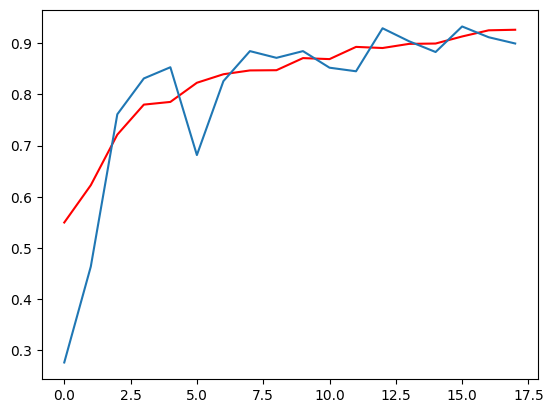

In [ ]:
plt.plot(history.history['accuracy'],color='red')
plt.plot(history.history['val_accuracy'])
plt.show()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       316
           1       0.98      0.72      0.83       281
           2       0.76      0.89      0.82       253
           3       0.92      0.99      0.95       293

    accuracy                           0.90      1143
   macro avg       0.90      0.90      0.89      1143
weighted avg       0.91      0.90      0.90      1143



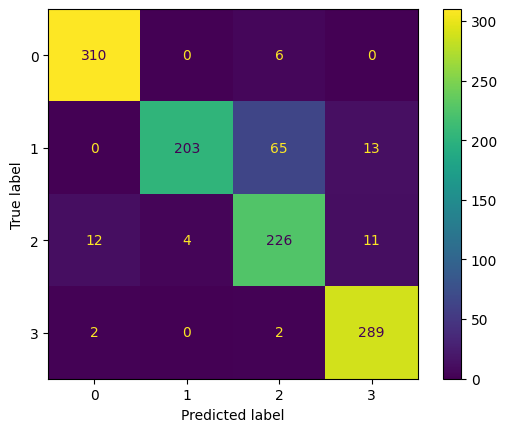

In [ ]:
cm = confusion_matrix(ytest,pred)
plot= ConfusionMatrixDisplay(cm)
plot.plot()
plt.show()

In [ ]:

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model_tumordetection = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model_tumordetection)

In [ ]:
import shutil
shutil.copy('/content/model.tflite','/content/drive/MyDrive/Dataset')

'/content/drive/MyDrive/Dataset/model.tflite'

In [ ]:
classes = ["NO_Tumor","Glioma","Meningioma","Pituitary"]
imgPath = '/content/drive/MyDrive/Dataset/dataset2/Testing/notumor/Te-noTr_0001.jpg'
img = cv.imread(imgPath)
img = cv.resize(img,(224,224))
# img = tf.keras.utils.load_img(imgPath, target_size=(img_height, img_width))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("This image most likely belongs to {}".format(classes[np.argmax(score)]))

---------------------------------------------------------------

## Prediction


In [ ]:
TF_MODEL_FILE_PATH = '/content/drive/MyDrive/Dataset/model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [ ]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['input_3'], 'outputs': ['dense_8']}}

In [ ]:
classify_lite = interpreter.get_signature_runner('serving_default')
classify_lite

In [ ]:
classes = ["NO_Tumor","Glioma","Meningioma","Pituitary"]
imgPath = '/content/drive/MyDrive/Dataset/dataset2/Testing/meningioma/Te-meTr_0000.jpg'
img = cv.imread(imgPath)
img = cv.resize(img,(224,224))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions_lite = classify_lite(input_3=img_array)['dense_8']
score_lite = tf.nn.softmax(predictions_lite)
print("This image most likely belongs to {}".format(classes[np.argmax(score_lite)]))

This image most likely belongs to Meningioma
